In [16]:
## Importing the essential libraries
# import pandas as pd
# import numpy as np
# import influxdb
# from influxdb import InfluxDBClient
# from influxdb import DataFrameClient
# from collections import defaultdict
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy
# import scipy.spatial
# import sklearn
# from sklearn.neighbors import NearestNeighbors
# from sklearn.neighbors import DistanceMetric
# import missingpy
# from missingpy import KNNImputer
# import timeit
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from timeit import default_timer as timer
import datetime
from datetime import datetime
from datetime import timedelta
# ## Connect with the database
# host = 'localhost'
# port = '8086'
# user = 'desh669'
# password = 'data'
# dbname = 'caltrans_30sec_D7'
# protocol = 'line'
# #protocol = 'json'
# client = DataFrameClient(host, port,user,password,dbname)
# client.switch_database(dbname)
# print(client.get_list_measurements())


### Query data and store it in a dataframe
# q = "select * from D7RAW_30s where time >= '2019-08-19T00:00:00Z' AND time < '2019-08-20T00:00:00Z' AND LOOP_1_OCCUPANCY < 1 AND LOOP_2_OCCUPANCY < 1 AND LOOP_3_OCCUPANCY < 1 AND LOOP_4_OCCUPANCY < 1"
# temp  = client.query(q, chunked=True)
# data_y = temp["D7RAW_30s"]


#data_y = data_y.drop(data_y.columns[[0,9,10,11,12,13,14,15,16,17,18]],axis = 1)
# print(data_y.shape)
# print(data_y.head())


### plot the traffic flows
# y = Mon_Fri_all.columns[[0,2,4]]
# for column in y:
#     onemonth_767896[column].rolling(120).mean().plot(figsize=(40,10), linewidth=5, fontsize=30)
#     plt.legend(y,fontsize = 15)
#     plt.xlabel('Timestamp',fontsize = 30)
#     plt.ylabel('Traffic Flow',fontsize = 30)
#     plt.xticks(rotation = 10)
#     plt.title('Traffic Flow for One Month',fontsize = 30)
#     plt.savefig('Mon_Fri_all_sensors.png')


## Group by the loop ID 
# dk = data_y.groupby('VDS_ID')
# ### only consider loops which were seen reporting data more than or equal to 2200 times on 19th August
# li = []
# for name, group in dk:
#     if group.shape[0] >= 2200:
#         li.append(group)       
# print(len(li))


# ### Again concatenate them to convert into a dataframe
# df_complete_data = pd.concat(li)
# print(df_complete_data.shape)


# ## Keep data for first lane only, remove all other data fields.
# df_final = df_complete_data.drop(df_complete_data.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]],axis = 1 )
# print(df_final.shape)
# df_final['Time'] = df_final.index


# ##Group by Loop_ID
# dc = df_final.groupby('VDS_ID')
# ## Take every dataframe in a list
# result = [g[1] for g in list(dc)]
# result = [dataframe.drop(['Time'], axis = 1) for dataframe in result]


# ## create a list of list containing traffic flows reported by every loop 
# big_list = []
# for dataframe in result:
#     big_list.append(list(dataframe.LOOP_1_FLOW))   
# print(len(big_list))
# VDS_List = []
# for dataframe in result:
#     VDS_List.append((list(dataframe.VDS_ID)[0]))

    
# ### Append all lists to a dataframe
# df = pd.DataFrame(big_list)    
# df['VDS_ID'] = [""]
# df['VDS_ID'] = VDS_List
# ## set loop Id as the index of the dataframe
# KNN_df = df.set_index('VDS_ID',drop = True)
# ## Fill all the missing values with 0
# KNN_df.fillna(0,inplace=True)


# ## calculate the euclidean distances between time series
# ary = scipy.spatial.distances.cdist(KNN_df_df,metric = 'euclidean')
# distances = pd.DataFrame(ary)
# print(distances.shape)


# ##Fit a KNN Classifier
# neigh = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean', p=2)
# neigh.fit(KNN_df,KNN_df)

# ## Find K neighbors of each point
# neighboring_loops = neigh.kneighbors(KNN_df,n_neighbors=3,return_distance = False)

# ## Since the original dataframe contains columns which contain many missing values, remove such columns with threshold 0.70
# df_new = df.dropna(thresh=0.70*len(df),axis = 1)

# ### Use KNN Imputer directly to fill in the missing values
# imputer = KNNImputer()
# X_imputed = imputer.fit_transform(df_new)
# X_imputed = pd.DataFrame(X_imputed)
##### all the misising values are filled, let us try to find some accuracy metrics.

In [5]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Anomaly Detection

C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Anomaly Detection


In [5]:
allday_767896 = pd.read_csv('allday_767896.csv',sep = ',')
allday_767896 = allday_767896.set_index('Unnamed: 0',drop = True)

### Introduce missing values in the dataset
allday_767896.Loop_1_FLOW.iloc[960:1960] = np.nan
allday_767896.Loop_1_FLOW.iloc[3840:4840] = np.nan
allday_767896.Loop_1_FLOW.iloc[6720:7720] = np.nan
allday_767896.Loop_1_FLOW.iloc[9600:10600] = np.nan
allday_767896.Loop_1_FLOW.iloc[12480:13480] = np.nan
allday_767896.Loop_1_FLOW.iloc[15360:16360] = np.nan
allday_767896.Loop_1_FLOW.iloc[18240:19240] = np.nan

allday_767896.Loop_1_FLOW.iloc[1960:2760] = np.nan
allday_767896.Loop_1_FLOW.iloc[4840:5640] = np.nan
allday_767896.Loop_1_FLOW.iloc[7720:8520] = np.nan
allday_767896.Loop_1_FLOW.iloc[10600:11400] = np.nan
allday_767896.Loop_1_FLOW.iloc[13480:14200] = np.nan
allday_767896.Loop_1_FLOW.iloc[16360:17100] = np.nan
allday_767896.Loop_1_FLOW.iloc[19240:20000] = np.nan

## plot the Traffic flows after introducing missing values in the dataset
y = allday_767896.columns[[1,3,5]]
for column in y:
    allday_767896[column].rolling(120).mean().plot(figsize=(40,10), linewidth=5, fontsize=30)
    plt.legend(y,fontsize = 15)
    plt.xlabel('Timestamp',fontsize = 30)
    plt.ylabel('Traffic Flow',fontsize = 30)
    plt.xticks(rotation = 10)
    plt.title('Periodically Missing Traffic Flow',fontsize = 30)
    #plt.savefig('Periodic_missing_KNN.png')
plt.show()
plt.close()

C:\Users\desh669\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


50.35959700000001
2.5939088025451342


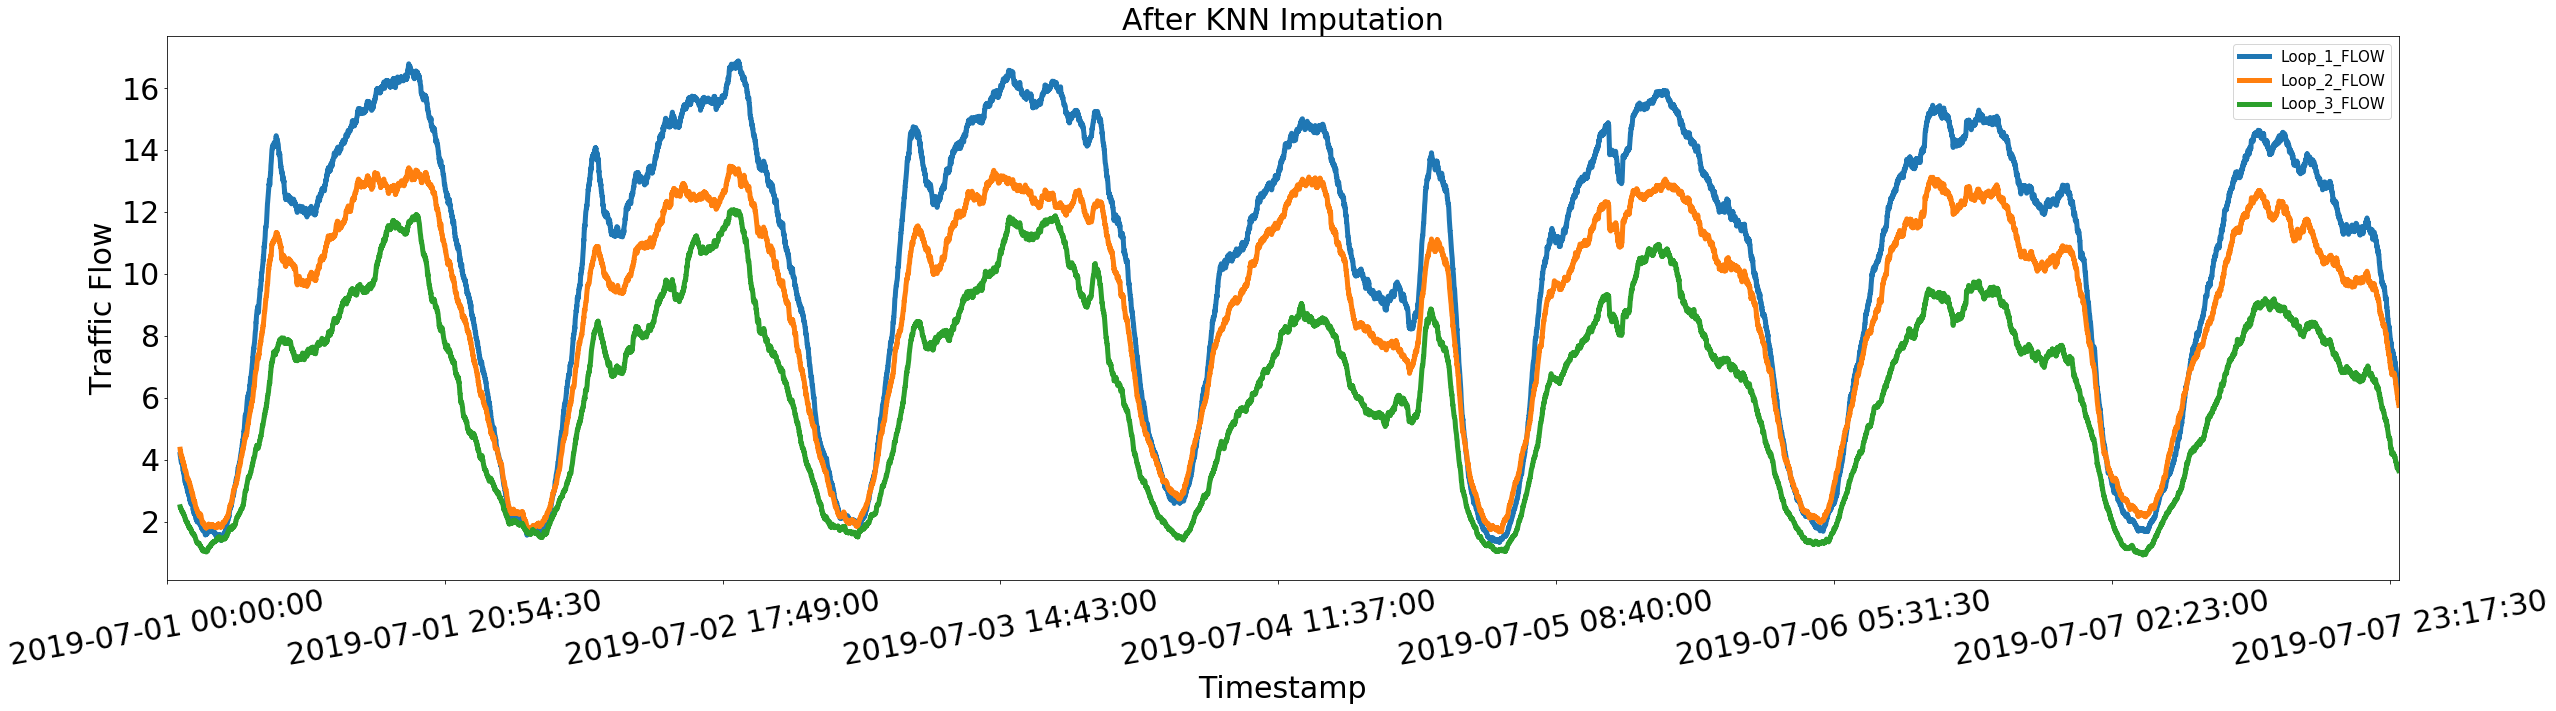

In [6]:
## count the missing values in a dataframe
len(allday_767896.index) - allday_767896.count()

### Remove unncessary columns such as loop ID and occupancies before performing imputation using KNN
allday_767896_flows = allday_767896.drop(allday_767896.columns[[0,2,4,6]],axis = 1)

##fit KNN model for imputation and measure the time required to impute the data\

start = timer()
imputer = KNNImputer()
X_imputed = imputer.fit_transform(allday_767896_flows)
X_imputed = pd.DataFrame(X_imputed)
end = timer()
print(end - start) 

### Add timestamp at index of the imputed data and rename the columns

X_imputed.index = allday_767896.index
X_imputed.columns = ['Loop_1_FLOW','Loop_2_FLOW',
                     'Loop_3_FLOW']

##Plot traffic flow after performing Imputation using KNN
y = X_imputed.columns
for column in y:
    X_imputed[column].rolling(120).mean().plot(figsize=(40,10),linewidth=5,fontsize=30)
    plt.legend(y,fontsize = 15)
    plt.xlabel('Timestamp',fontsize = 30)
    plt.ylabel('Traffic Flow',fontsize = 30)
    plt.xticks(rotation = 10)
    plt.title('After KNN Imputation',fontsize = 30)
    #plt.savefig('Periodically_Missing_Flow_KNN_2.png')
    
complete_data = pd.read_csv('allday_767896.csv',sep = ',')
## Calculate and print the Root Meas Squre Error
rms = sqrt(mean_squared_error(complete_data.Loop_1_FLOW, X_imputed.Loop_1_FLOW))

print(rms)
plt.show()
plt.close()

In [1]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Anomaly Detection

C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Anomaly Detection


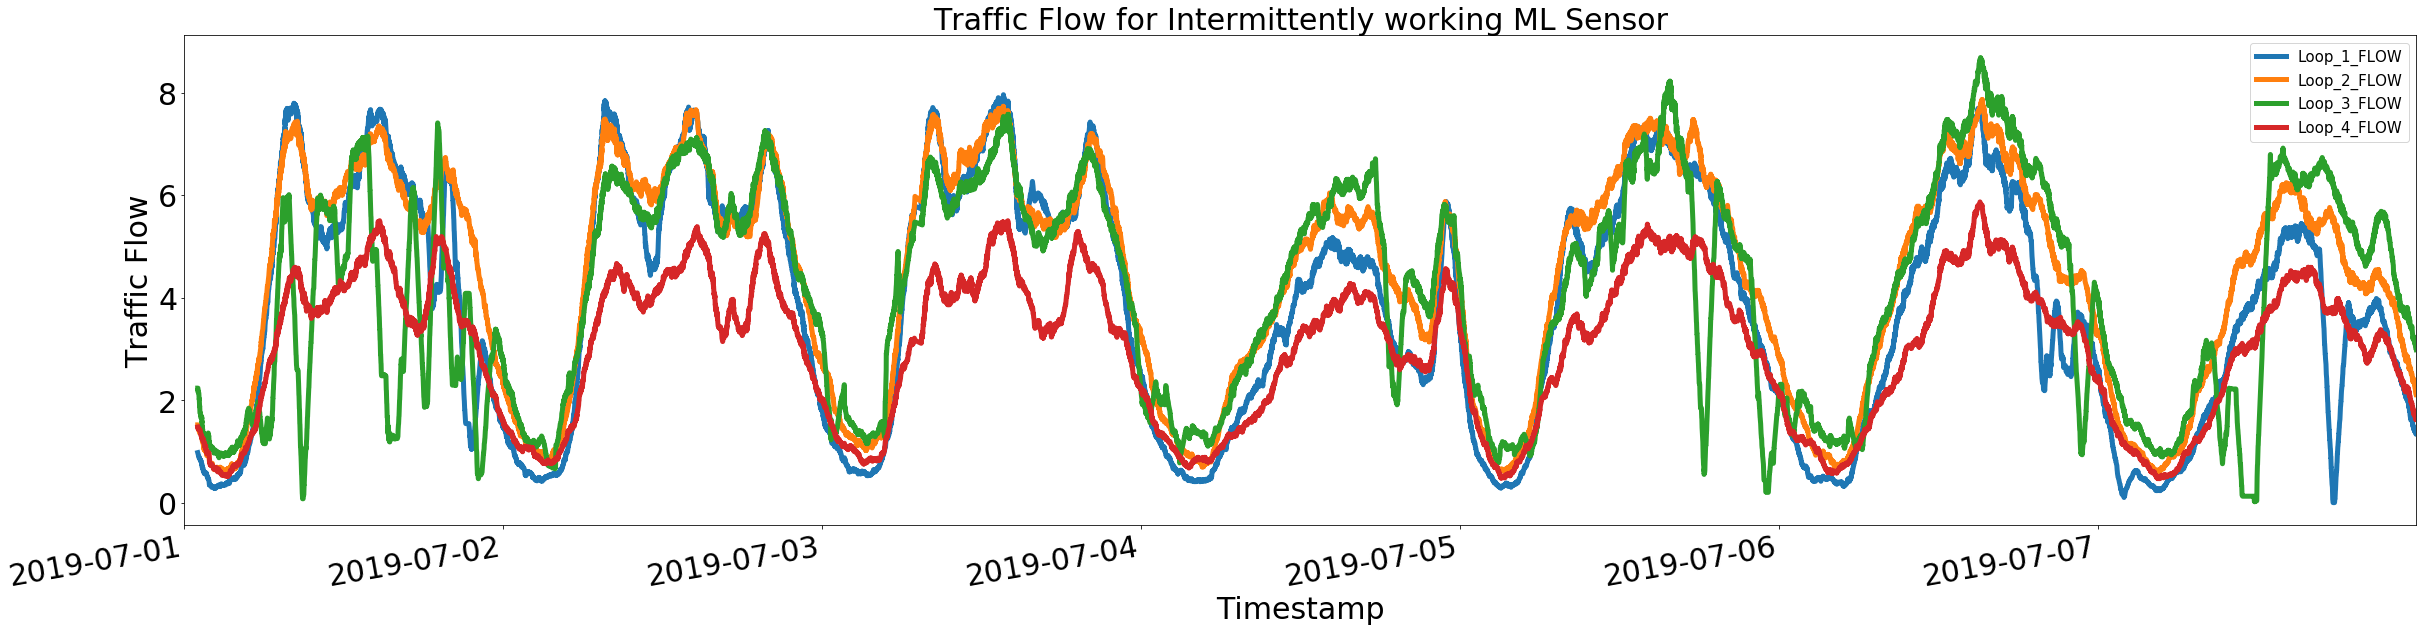

In [96]:
chunk_list = []
df_chunk = pd.read_csv(r'C:/Users/desh669/OneDrive - PNNL/Documents/Python Scripts/Mobility Rahul/Anomaly Detection/importantdataframe.csv', chunksize=1000000)
## each chunk is in df format
for chunk in df_chunk:
    ## perform data filtering
    allday_717379_chunk = chunk.loc[chunk['VDS_ID'] == 717379]
    ## append the chunk to the list
    chunk_list.append(allday_717379_chunk)
## concat the list into a dataframe

allday_717379 = pd.concat(chunk_list)

allday_717379.time = allday_717379.time.astype(str)
dates = []
for time in allday_717379.time:
    d = datetime.strptime(time,'%Y%m%d%H%M%S')
    dates.append(d)
allday_717379.index = dates
    
allday_717379 = allday_717379.drop(allday_717379.columns[[0,1,2,3,12,13,14,15,16,17,18,19,20]],axis =1)

allday_717379.head()

y = allday_717379.columns[[0,2,4,6]]
for column in y:
    allday_717379[column].rolling(120).mean().plot(figsize=(40,10),linewidth=5,fontsize=30)
    plt.legend(y,fontsize = 15)
    plt.xlabel('Timestamp',fontsize = 30)
    plt.ylabel('Traffic Flow',fontsize = 30)
    plt.xticks(rotation = 10)
    plt.title('Traffic Flow for Intermittently working ML Sensor',fontsize = 30)
    #plt.savefig('Periodically_Missing_Flow_KNN_2.png')

In [100]:
print(len(allday_717379.index) - allday_717379.count())
(allday_717379 == 0).astype(int).sum(axis=0)
#print(allday_717379.shape)


Loop_1_FLOW         3329
Loop_1_Occupancy       0
Loop_2_FLOW            0
Loop_2_Occupancy       0
Loop_3_FLOW         5986
Loop_3_Occupancy       0
Loop_4_FLOW         2271
Loop_4_Occupancy       0
dtype: int64


Loop_1_FLOW         2107
Loop_1_Occupancy    4793
Loop_2_FLOW         3865
Loop_2_Occupancy    3692
Loop_3_FLOW          884
Loop_3_Occupancy    2894
Loop_4_FLOW         3468
Loop_4_Occupancy    4901
dtype: int64

In [97]:
#Lane1 Day 1 Intermittent
allday_717379[0:2597].loc[allday_717379.Loop_1_FLOW == 0, 'Loop_1_FLOW'] = np.nan
## Lane 2 is good on 1st Day
##Lane 3 Day 1 High Value
allday_717379.Loop_3_FLOW.iloc[0:2597] = np.nan
## Lane 4 Day 1 Intermittent
allday_717379[0:2597].iloc[:,[6]].replace(0, np.nan)

##Lane1 Day 2 Intermittent
allday_717379[2597:5659].loc[allday_717379.Loop_1_FLOW == 0, 'Loop_1_FLOW'] = np.nan
## Lane 2 is good on 2nd Day
##Lane3 Day 2 Intermittent
allday_717379[2597:5659].loc[allday_717379.Loop_3_FLOW == 0, 'Loop_3_FLOW'] = np.nan
##Lane4 Day 2 Intermittent
allday_717379[2597:5659].loc[allday_717379.Loop_4_FLOW == 0, 'Loop_4_FLOW'] = np.nan

##Lane 1 is good on 3rd Day
##Lane 2 is good on 3rd Day
allday_717379[5659:8437].loc[allday_717379.Loop_3_FLOW == 0, 'Loop_3_FLOW'] = np.nan
allday_717379[5659:8437].loc[allday_717379.Loop_4_FLOW == 0, 'Loop_4_FLOW'] = np.nan

## Lane 3 Day 4 Intermittent
allday_717379[8437:11264].loc[allday_717379.Loop_3_FLOW == 0, 'Loop_3_FLOW'] = np.nan

## Lane 3 Day 5 Intermittent
allday_717379[11264:14070].loc[allday_717379.Loop_3_FLOW==0,'Loop_4_FLOW'] = np.nan

## Lane 1 Day 6
allday_717379[14070:16905].loc[allday_717379.Loop_1_FLOW == 0, 'Loop_1_FLOW'] = np.nan
## Lane 3 Day 6
allday_717379[14070:16905].loc[allday_717379.Loop_3_FLOW == 0, 'Loop_3_FLOW'] = np.nan

##Lane 1 Day 7
allday_717379[16905:].loc[allday_717379.Loop_1_FLOW == 0, 'Loop_1_FLOW'] = np.nan
## lane 3 Day 7
allday_717379[16905:].loc[allday_717379.Loop_3_FLOW == 0, 'Loop_3_FLOW'] = np.nan

y = allday_717379.columns[[0,2,4,6]]
for column in y:
    allday_717379[column].rolling(120).mean().plot(figsize=(40,10),linewidth=5,fontsize=30)
    plt.legend(y,fontsize = 15)
    plt.xlabel('Timestamp',fontsize = 30)
    plt.ylabel('Traffic Flow',fontsize = 30)
    plt.xticks(rotation = 10)
    plt.title('Traffic Flow for Intermittently working ML Sensor',fontsize = 30)
    #plt.savefig('Periodically_Missing_Flow_KNN_2.png')
plt.show()
plt.close()

C:\Users\desh669\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\desh669\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\desh669\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [106]:
# ##fit KNN model for imputation and measure the time required to impute the data\

# start = timer()
# imputer = KNNImputer()
# X_imputed = imputer.fit_transform(allday_717379)
# X_imputed = pd.DataFrame(X_imputed)
# end = timer()
# print(end - start) 

### Add timestamp at index of the imputed data and rename the columns

# # X_imputed.index = allday_717379.index
# X_imputed.columns = ['Loop_1_FLOW','Loop_1_Occupancy','Loop_2_FLOW','Loop_2_Occupancy',
#                      'Loop_3_FLOW','Loop_3_Occupancy','Loop_4_FLOW','Loop_4_Occupancy']

plt.close()
y = X_imputed.columns[[0,2,4,6]]
for column in y:
    X_imputed[column].rolling(120).mean().plot(figsize=(40,10),linewidth=5,fontsize=30)
    plt.legend(y,fontsize = 15)
    plt.xlabel('Timestamp',fontsize = 30)
    plt.ylabel('Traffic Flow',fontsize = 30)
    plt.xticks(rotation = 10)
    plt.title('After KNN Imputation',fontsize = 30)
    #plt.savefig('Periodically_Missing_Flow_KNN_2.png')
